In [ ]:
import cv2
import numpy as np
from math import exp
import matplotlib.pyplot as plt

# Probability as a function of distance from the center derived
# from a gaussian distribution with mean = 0 and stdv = 1
scaledGaussian = lambda x : exp(-(1/2)*(x**2))
img = cv2.imread('0133.jpg')
plt.subplot()
plt.imshow(img)
h,w = img.shape[:2]
h,w

### Read xml

True

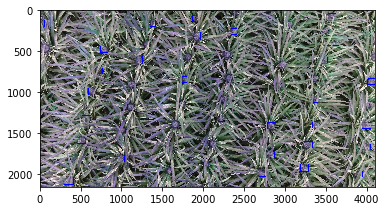

In [30]:
import xml.etree.ElementTree as ET
xml_path = '0133.xml'
xml = ET.parse(xml_path).getroot()

bboxes = []

labelled = img
labelled_path = 'labelled.jpg'
root = ET.parse(xml_path).getroot()
for obj in root.iter('object'):
    bbox = obj.find('bndbox')
    xmin = int(bbox.find('xmin').text.strip())
    ymin = int(bbox.find('ymin').text.strip())
    xmax = int(bbox.find('xmax').text.strip())
    ymax = int(bbox.find('ymax').text.strip())
    bboxes.append([xmin,ymin,xmax,ymax])
    labelled = cv2.rectangle(labelled, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)

plt.subplot()
plt.imshow(labelled)
cv2.imwrite(labelled_path, labelled)

### Create Heatmap

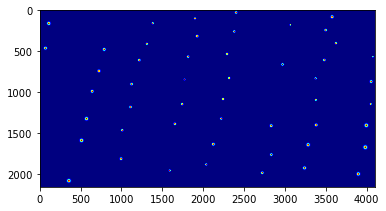

In [58]:
isotropicGaussianHeatmapImage = np.zeros((h,w,3),np.uint8)
#isotropicGaussianHeatmapImage = cv2.rectangle(isotropicGaussianHeatmapImage, (0, 0), (w, h), (255, 0, 0), -1)
isotropicGaussianHeatmapImage = cv2.applyColorMap(isotropicGaussianHeatmapImage,cv2.COLORMAP_JET)
for bbox in bboxes :
    bbox_h = bbox[3]-bbox[1]
    bbox_w = bbox[2]-bbox[0]
    scale_heatmap = np.zeros((bbox_h,bbox_w),np.uint8)
    for i in range(bbox_h):
        for j in range(bbox_w):
        # find euclidian distance from center of image (W/2,W/2)
        # and scale it to range of 0 to 2.5 as scaled Gaussian
        # returns highest probability for x=0 and approximately
        # zero probability for x > 4.5
            distanceFromCenter = np.linalg.norm(np.array([i-bbox_h/2,j-bbox_w/2]))
            distanceFromCenter = 4.5*distanceFromCenter/(bbox_w/2)
            scaledGaussianProb = scaledGaussian(distanceFromCenter)
            scale_heatmap[i,j]=np.clip(scaledGaussianProb*255,0,255)
    # Convert Grayscale to HeatMap Using Opencv
    isotropicGaussianHeatmapImage[bbox[1]:bbox[3],bbox[0]:bbox[2]] = cv2.applyColorMap(scale_heatmap,cv2.COLORMAP_JET)
plt.subplot()
cv2.imwrite('heatmap_output.jpg',isotropicGaussianHeatmapImage)
#GBR -> RGB for plt
isotropicGaussianHeatmapImage = isotropicGaussianHeatmapImage[...,::-1]
plt.imshow(isotropicGaussianHeatmapImage)
